# Exercises 1: Getting Started with Jupyter & Floating-Point Numbers

Floating-point numbers are used on many computer architectures to approximate real numbers. However, in practice, they can behave very differently. The purpose of this homework is to experiment with floating-point numbers to understand them better. 


- - -

## 1.1 Simple but hard to remember

### Task
Fill out the group number of the group members in the first cell above.

## 1.2 Elementary Operations

In Python, the default type for floating point numbers (i.e., of the `float` data type) is the double-precision. Computations on these can be simply translated using the default math operators `+`,`-`,`*`,`/`. The `**` operator allows exponentiation. 

Example:

In [3]:
x = 25
a = (3.5*x**2 - 32) * 4

a

8622.0

By default, a notebook cell outputs the last result if unassigned, as above. Explicit printing, e.g. for intermediate results, is also possible.

In [4]:
b = a / 8622.0

print( x, a, b )

25 8622.0 1.0


Notes:
- As is apparent above, variables defined in a cell live beyond the execution of the cell and can be used in later cells.
- A number should be explicitly marked as float by either writing e.g. `float(3)` or `3.0`. Otherwise, numbers may be (mis-)interpreted as integers (`int` data type), and results may differ from expectations.

It is possible to use the text (Markdown) cells to typeset mathematical equations in LaTeX format. For example, the general solution of the quadratic equation $ax^2 + bx + c = 0$ is given by

$$x_{1,2} = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}.$$

This allows typesetting even complex formulas such as the Maxwell equations:

$$
\begin{aligned}
\frac{\partial\mathcal{D}}{\partial t} \quad & = \quad \nabla\times\mathcal{H},   & \\[5pt]
\frac{\partial\mathcal{B}}{\partial t} \quad & = \quad -\nabla\times\mathcal{E},  & \\[5pt]
\nabla\cdot\mathcal{B}                 \quad & = \quad 0,                         & \\[5pt]
\nabla\cdot\mathcal{D}                 \quad & = \quad 0.                         & 
\end{aligned}
$$

See the [Markdown formatting syntax](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html) for more examples of what is possible.

### Task
Translate the formula for the roots of the quadratic equation above into a Python function that takes the coefficients $a$, $b$, $c$ as input and outputs returns the roots. Complete the skeleton function `quadratic_roots` given below. Validate your implementation by running the cell below after your implementation is complete. 

Notes: 
- Make sure to run the cell above after you have modified it to (re)define the function!
- A quadratic equation can have two distinct roots (if $b^2-4ac \geq 0$), one (double) root (if $b^2 = 4ac$), or no roots (if $b^2 < 4ac$). Return a list of roots, or `None` in the last case.
- To compute the square root, you need the `sqrt` function from Python's `math` module; hence, this must be imported first, as already done below.

In [1]:
import math

def quadratic_roots(a, b, c):
    # Calculate the discriminant
    discriminant = b**2 - 4*a*c
    
    if discriminant > 0:
        # Two distinct roots
        root1 = (-b + math.sqrt(discriminant)) / (2*a)
        root2 = (-b - math.sqrt(discriminant)) / (2*a)
        return [root1, root2]
    elif discriminant == 0:
        # One double root
        root = -b / (2*a)
        return [root]
    else:
        # No real roots
        return None

In [2]:
# Test cases
print(quadratic_roots(1, 0, 1))  # Should return None (complex roots)
print(quadratic_roots(1, -4, 4))  # Should return [2.0] (double root)
print(quadratic_roots(1, -3, 2))  # Should return [2.0, 1.0] (two distinct roots)

None
[2.0]
[2.0, 1.0]


- - - 

## 1.3 Very Basic Plotting

Through the [matplotlib](https://matplotlib.org) Python package, it is possible to include basic (and also very fancy) plots in a Jupyter Notebook.

To make sure this works, the package has to be installed. This can be done with the so-called *cell magic*
```%pip install matplotlib```, which uses the Python package manager to install the package. (If the package is already installed, it does nothing, so it's safe to use it repeatedly.) 

Furthermore, matplotlib must be imported (`import matplotlib.pyplot as plt`) and instructed to output to Jupyter. The latter is done with the `%matplotlib inline` magic. Both of these must only be done once per notebook, preferably at the top.

The below code illustrates all of this, and draws a nice plot. (Feel free to play around, and see also matplotlib's [tutorials](https://matplotlib.org/tutorials/index.html) and [examples](https://matplotlib.org/gallery/index.html)).

Note: you may need to restart the kernel to use updated packages.


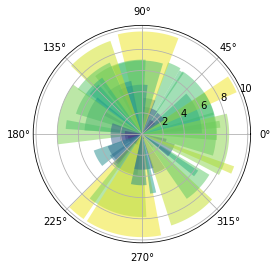

In [5]:
%pip install -q matplotlib 
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(19680801)

N = 50
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = 10 * np.random.rand(N)
width = np.pi / 4 * np.random.rand(N)
colors = plt.cm.viridis(radii / 10.)

ax = plt.subplot(111, projection='polar')
ax.bar(theta, radii, width=width, bottom=0.0, color=colors, alpha=0.5)

plt.show()

The `numpy` package provides tools for working with arrays of numbers, such as e.g. matrices or vectors. It is crucially used for plotting to set up arrays of coordinates. (It is not too important to understand the details of NumPy for this homework, but if you are interested, see [here](https://docs.scipy.org/doc/numpy/user/quickstart.html)).

Here's a simpler plot:

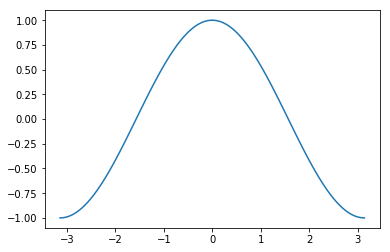

In [7]:
x = np.linspace( -math.pi, math.pi, 100 ) # create 100 points over interval (-pi,pi)
f = np.cos(x)                             # compute function of all values in array
plt.plot( x, f );                         # plot the result

### Task

Plot the function $x^3 - \sqrt{x}$ over $[-1,1]$ by duplicating and modifying the above example.

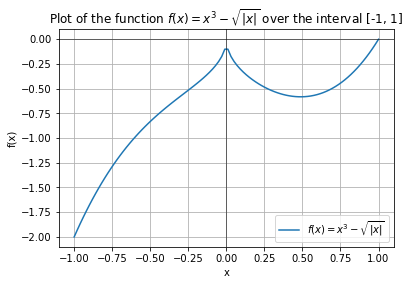

In [3]:
# insert solution here
import math
import numpy as np
import matplotlib.pyplot as plt

# Define the interval and the function
x = np.linspace(-1, 1, 100)  # Create 100 points over the interval [-1, 1]
f = x**3 - np.sqrt(np.abs(x))  # Compute the function f(x) = x^3 - sqrt(x) for all values in x

# Plot the result
plt.plot(x, f, label=r"$f(x) = x^3 - \sqrt{|x|}$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Plot of the function $f(x) = x^3 - \sqrt{|x|}$ over the interval [-1, 1]")
plt.axhline(0, color='black', linewidth=0.5)  # Adding a horizontal line at y=0 for reference
plt.axvline(0, color='black', linewidth=0.5)  # Adding a vertical line at x=0 for reference
plt.legend()
plt.grid(True)
plt.show()


- - -

## 1.4 Properties of Floating-Point Numbers

After you have gotten more comfortable with Notebooks, let us now work on the lecture material.

Python's `math` module offers many interesting functions. Use the `frexp` function to print mantissa (including sign) and exponent of floating-point numbers.

In [8]:
print( "1 =", math.frexp(1.0) )
print( "16 =", math.frexp(16.0) )
print( "1/256 =", math.frexp(1/256.0))

1 = (0.5, 1)
16 = (0.5, 5)
1/256 = (0.5, -7)


### Task
Write an inverse function that takes as arguments a mantissa (between 0 and 1) and exponent, and outputs the floating point number these represent.

In [7]:
import math

def make_float(mantissa, exponent):
    # The formula to reconstruct the floating-point number is:
    # value = mantissa * (2 ** exponent)
    return mantissa * (2 ** exponent)

# Validation
a = 0.7578125
m, e = math.frexp(a)
print(f"{a:.20f} reconstructed as {make_float(m, e):.20f}")

a = 1/3
m, e = math.frexp(a)
print(f"{a:.20f} reconstructed as {make_float(m, e):.20f}")

# Testing with more precision
print(f"Original: {a:.30f}")
print(f"Reconstructed: {make_float(m, e):.30f}")


0.75781250000000000000 reconstructed as 0.75781250000000000000
0.33333333333333331483 reconstructed as 0.33333333333333331483
Original: 0.333333333333333314829616256247
Reconstructed: 0.333333333333333314829616256247


Validate by running the cell below.

In [8]:
a = 0.7578125
m, e = math.frexp( a )
print( a, make_float( m, e ) )

a = 1/3
m, e = math.frexp( a )
print( a, make_float( m, e ) )

0.7578125 0.7578125
0.3333333333333333 0.3333333333333333


Beyond simply printing the number, Python can be instructed to use more or less precision when doing so. This is achieved using [string formatting](https://pyformat.info) like so:

In [6]:
print( " {:f}".format(0.1) )       # simply format number in default style
print( " {:.10f}".format(0.1) )    # use 10 digits of precision
print( " {:.20f}".format(0.1) )    # use 20 digits of precision
print( " {:.30e}".format(0.1) )    # use decimal scientific notation with 30 digits of precision

 0.100000
 0.1000000000
 0.10000000000000000555
 1.000000000000000055511151231258e-01


As is obvious, $0.1$ cannot be represented exactly as a floating-point number.

### Task
To approximately determine the number of digits in the mantissa of a Python `float`, write a function that finds the smallest number $n$ such that $1+2^{-n}$ is equal to $1$, in floating-point arithmetic.

Note: $2^{-n}$ is often called *machine epsilon*, because relative differences between numbers below this threshold are unreliable.

In [9]:
def epsilon():
    n = 0
    while True:
        if 1 + 2**-n == 1:
            break
        n += 1
    return n

# Calculate epsilon
e = epsilon()
print(e, 2**(-e))

# Compare with machine epsilon from sys module
import sys
print(sys.float_info.epsilon)


53 1.1102230246251565e-16
2.220446049250313e-16


This number is also available directly as `sys.float_info.epsilon` from the `sys` module.

In [10]:
import sys
print( sys.float_info.epsilon )

2.220446049250313e-16


- - -

## 1.5 Horner's Method

The *Horner's Method* can be used to evaluate a polynomial in a numerically robust manner.

Consider for example the polynomial

$$
x^9 - 18x^8 + 144x^7 - 672x^6 + 2016x^5 - 4032x^4 + 5376x^3 - 4608x^2 + 2304x - 512.
$$

Below is a naive algorithm that evaluates the polynomial directly as given, taking a list `coeff` of coefficients, such that $a_0 =$ `coeff[0]` etc., and $x$, as input parameters.

In [11]:
def poly_simple( coeff, x ):
    sum = 0.0
    
    for i, c in enumerate(coeff):
        sum += c * x**i
        
    return sum

Let's plot the result of the evaluation in a narrow interval around $1$. Note that since NumPy directly applies numerical operations to all elements of an array, we can directly pass the entire array of evaluation points to our function without changes – neat!

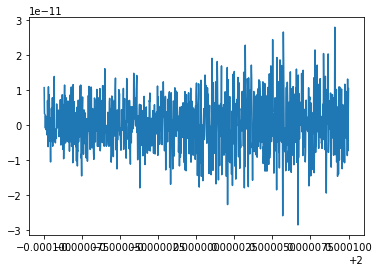

In [12]:
a = [-512, 2304, -4608, 5376, -4032, 2016, -672, 144, -18, 1] # coefficients

x = np.linspace( 1.9999, 2.0001, 1000 )
p = poly_simple(a, x)

plt.plot( x, p );

As apparent, the evaluation is not very robust. Although we might expect 16 digits of precision, the computed values jiggle aroundin the last five digits.

Horner's method uses a different approach to evaluation. The idea is to rewrite the polynomial as 

$$a_0 + x \bigg(a_1 + x \Big(a_2 + x \big(a_3 + \cdots + x(a_{n-1} + x \, a_n) \cdots \big) \Big) \bigg)$$

and evaluate the terms recursively. 

### Task
Below, implement the function `poly_horner`, with the same inputs as `poly_simple`, that evaluates the polynomial using Horner's method, and investigate your implementation using the cells below.

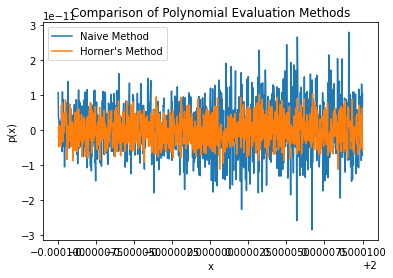

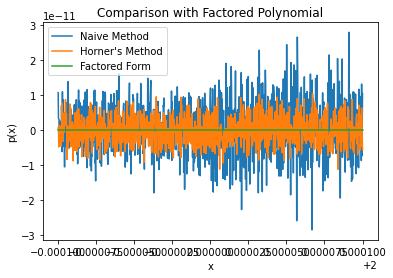

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def poly_horner(coeff, x):
    result = coeff[-1]
    for c in reversed(coeff[:-1]):
        result = result * x + c
    return result

# Given coefficients of the polynomial
a = [-512, 2304, -4608, 5376, -4032, 2016, -672, 144, -18, 1]

# Interval around 1 for evaluation
x = np.linspace(1.9999, 2.0001, 1000)

# Evaluate the polynomial using both methods
p_simple = poly_simple(a, x)
p_horner = poly_horner(a, x)

# Plot both results
plt.plot(x, p_simple, label='Naive Method')
plt.plot(x, p_horner, label="Horner's Method")
plt.legend()
plt.title("Comparison of Polynomial Evaluation Methods")
plt.xlabel("x")
plt.ylabel("p(x)")
plt.show()

# Factored form evaluation
p_factored = (x - 2)**9

# Plot all three results
plt.plot(x, p_simple, label='Naive Method')
plt.plot(x, p_horner, label="Horner's Method")
plt.plot(x, p_factored, label='Factored Form')
plt.legend()
plt.title("Comparison with Factored Polynomial")
plt.xlabel("x")
plt.ylabel("p(x)")
plt.show()


Let's compare both approaches in a plot:

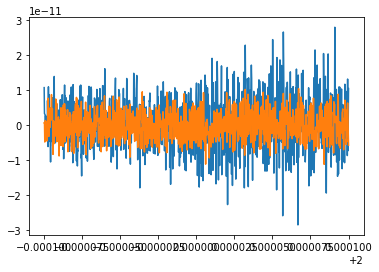

In [14]:
p_simple = poly_simple(a, x)
p_horner = poly_horner(a, x)

plt.plot( x, p_simple, x, p_horner );

Horner's method behaves better than the naïve approach.

Of course, staring at the polynomial hard enough, we notice that it is actually the expanded form of $(x-2)^9$. Evaluating this directly, we find the best approximation:

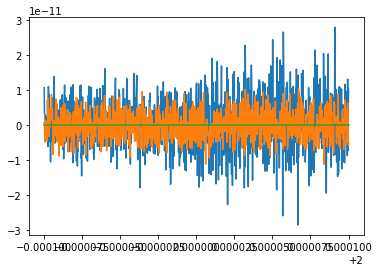

In [15]:
p_factored = (x-2)**9
plt.plot( x, p_simple, x, p_horner, x, p_factored );

- - -